<a href="https://colab.research.google.com/github/kwanderer/Autonomas-sistemas-un-roboti/blob/main/CNN/Model_1_by_one_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
import seaborn as sns 
%matplotlib inline

In [6]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/MyDrive/Colab Notebooks/data_multiclass")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
df = pd.read_csv("combined_multiclass_csv.csv")

In [8]:
df.head()

,tachometer,und-accelerometer-axial,und-accelerometer-radial,und-accelerometer-tangential,over-accelerometer-axial,over-accelerometer-radial,over-accelerometer-tangential,microphone,Class
0,-0.59640,1.65690,0.20359,0.048174,-0.18477,-0.021301,-0.18447,-0.017205,7
1,-0.52322,-0.28902,-0.31740,-0.001450,-0.19779,-0.023694,-0.28712,-0.018203,7
2,-0.55320,1.64770,0.41715,0.038655,-0.18563,-0.021564,-0.21215,-0.072039,7
3,-0.57723,0.15914,-0.33321,-0.011148,-0.19892,-0.025401,-0.30076,-0.007373,7
4,-0.49280,1.31650,0.41147,0.028096,-0.19165,-0.022879,-0.24147,-0.108590,7


In [9]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 30000000 rows and 9 columns.


Text(0.5, 1.0, 'Heatmap of Correlation')

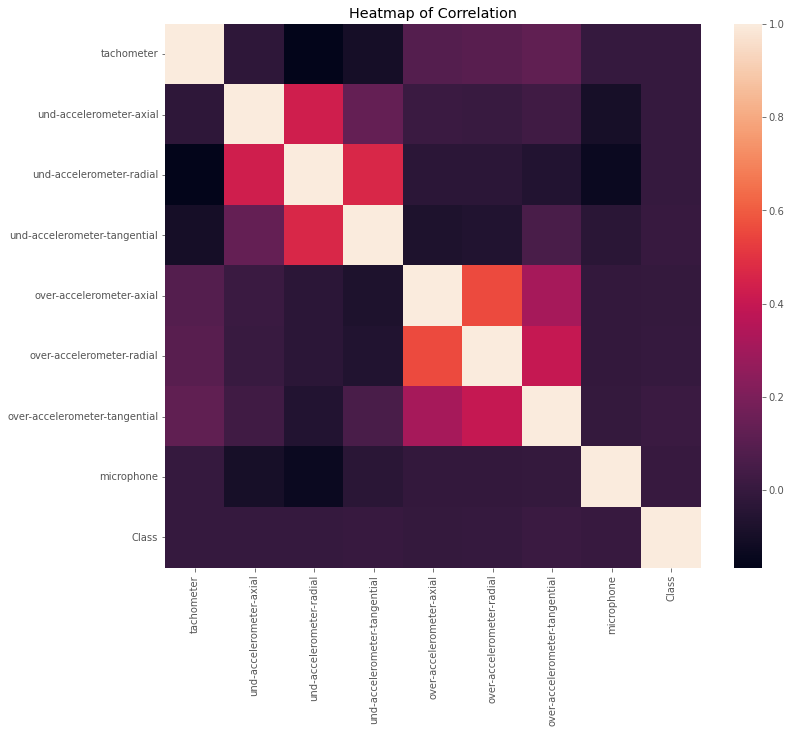

In [10]:
#finding correlation between columns and plotting heatmap

corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [11]:
df.isnull().sum()

tachometer                       0
und-accelerometer-axial          0
und-accelerometer-radial         0
und-accelerometer-tangential     0
over-accelerometer-axial         0
over-accelerometer-radial        0
over-accelerometer-tangential    0
microphone                       0
Class                            0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000000 entries, 0 to 29999999
Data columns (total 9 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   tachometer                     float64
 1   und-accelerometer-axial        float64
 2   und-accelerometer-radial       float64
 3   und-accelerometer-tangential   float64
 4   over-accelerometer-axial       float64
 5   over-accelerometer-radial      float64
 6   over-accelerometer-tangential  float64
 7   microphone                     float64
 8   Class                          int64  
dtypes: float64(8), int64(1)
memory usage: 2.0 GB


**Model-1(Over Sampling)**

In [13]:
# Target y and features X for developing NN models
y = df.Class
X = df.drop(['Class'], axis=1)

In [14]:
X.shape, y.shape

((30000000, 8), (30000000,))

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, roc_auc_score

In [16]:
# split the data (X, y) to train-data and test-data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.2, stratify=y, random_state=42)

In [17]:
X_train.shape, X_test.shape

((18000000, 8), (6000000, 8))

In [18]:
y_train.shape, y_test.shape

((18000000,), (6000000,))

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [21]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [22]:
X_train.shape, X_test.shape

((18000000, 8, 1), (6000000, 8, 1))

In [23]:
X_train[:10]

array([[[-0.28320412],
        [ 0.50028105],
        [ 0.66452213],
        [ 0.12536955],
        [-0.31951094],
        [-1.32547487],
        [-0.84157509],
        [-0.22603947]],

       [[-0.38465323],
        [ 1.64925789],
        [ 2.33101338],
        [ 0.72135599],
        [-0.12422902],
        [-0.96856031],
        [-0.24939131],
        [-0.08574124]],

       [[-0.24325128],
        [-0.34615008],
        [-0.38135769],
        [-1.97879412],
        [-0.4295688 ],
        [-1.23826447],
        [ 0.03695076],
        [-0.16468697]],

       [[-0.40933677],
        [ 0.83433572],
        [-0.86597335],
        [-0.4711376 ],
        [ 0.17231919],
        [ 0.2755502 ],
        [ 0.24068365],
        [ 0.16108445]],

       [[-0.37478953],
        [ 1.36055023],
        [ 1.60856608],
        [-1.41725972],
        [ 0.1242941 ],
        [ 1.03828801],
        [-0.82384383],
        [-0.1840415 ]],

       [[-0.36101437],
        [-0.64948227],
        [ 0.65617328],
 

In [24]:
df = 0
x = 0
y = 0

In [25]:
epochs=50
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=X_train[0].shape),
    tf.keras.layers.MaxPooling1D(pool_size=1),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D((1)),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1)
])

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 32)             128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 32)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 64)             6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 64)            0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 2, 64)             12352     
                                                                 
 flatten (Flatten)           (None, 128)               0

In [26]:
# Compile the model as usual
optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model_cnn.compile(optimizer=optimizer,
                 loss='mse',
                 metrics=['accuracy'])

In [27]:
# Train the model
history = model_cnn.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/50
35157/35157 [==============================] - 201s 5ms/step - loss: 2.4357 - accuracy: 0.1919 - val_loss: 2.3131 - val_accuracy: 0.1985
Epoch 2/50
35157/35157 [==============================] - 200s 6ms/step - loss: 2.2899 - accuracy: 0.1992 - val_loss: 2.2803 - val_accuracy: 0.2006
Epoch 3/50
35157/35157 [==============================] - 181s 5ms/step - loss: 2.2651 - accuracy: 0.2015 - val_loss: 2.2545 - val_accuracy: 0.2009
Epoch 4/50
35157/35157 [==============================] - 199s 6ms/step - loss: 2.2504 - accuracy: 0.2026 - val_loss: 2.2409 - val_accuracy: 0.2027
Epoch 5/50
35157/35157 [==============================] - 199s 6ms/step - loss: 2.2399 - accuracy: 0.2033 - val_loss: 2.2355 - val_accuracy: 0.2032
Epoch 6/50
35157/35157 [==============================] - 199s 6ms/step - loss: 2.2320 - accuracy: 0.2037 - val_loss: 2.2387 - val_accuracy: 0.2045
Epoch 7/50
35157/35157 [==============================] - 199s 6ms/step - loss: 2.2255 - accuracy: 0.2040 - val_

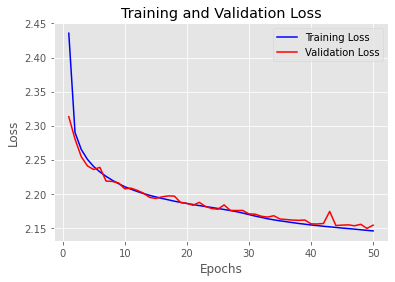

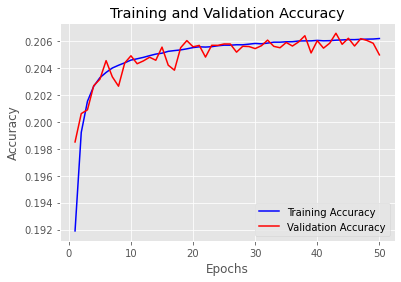

In [30]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('cnn_loss_plot.png')
plt.show()

plt.figure()

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('cnn_acc_plot.png')
plt.show()

In [31]:
val_predictions = model_cnn.predict(X_test)

In [32]:
unique, counts = np.unique(val_predictions, return_counts=True)

In [33]:
unique

array([-3.5072098, -3.4180007, -2.549595 , ...,  7.9471574,  8.010447 ,
        8.021195 ], dtype=float32)

In [34]:
#val_predictions = model_cnn.predict(X_test)
pred=np.around(val_predictions)
pred

array([[ 6.],
       [ 5.],
       [-0.],
       ...,
       [ 1.],
       [ 4.],
       [ 5.]], dtype=float32)

In [35]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        -4.0       0.00      0.00      0.00         0
        -3.0       0.00      0.00      0.00         0
        -2.0       0.00      0.00      0.00         0
        -1.0       0.00      0.00      0.00         0
         0.0       0.89      0.73      0.80    750000
         1.0       0.84      0.70      0.76    750000
         2.0       0.63      0.26      0.37    750000
         3.0       0.31      0.22      0.26    750000
         4.0       0.22      0.45      0.30    750000
         5.0       0.19      0.50      0.27    750000
         6.0       0.30      0.15      0.20    750000
         7.0       0.65      0.01      0.03    750000
         8.0       0.00      0.00      0.00         0

    accuracy                           0.38   6000000
   macro avg       0.31      0.23      0.23   6000000
weighted avg       0.50      0.38      0.37   6000000



In [36]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

In [37]:
cfm=confusion_matrix(y_test, pred)

In [38]:
cfm

array([[     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0],
       [     1,      2,     21,    391, 547486,  78393,  18464,  18492,
         34041,  47520,   5114,     75,      0],
       [     0,      0,      0,     10,  68107, 525820,  57491,  30483,
         35464,  30056,   2539,     30,      0],
       [     0,      0,      0,      0,    471,  17135, 193821, 163755,
        202357, 156844,  15472,    144,      1],
       [     0,      0,      0,      0,     33,    705,  19729, 164615,
        317243, 231666,  15940,     69,      0],
       [     0,      0,      0, 

In [44]:
y_test

array([2, 7, 0, ..., 0, 3, 3])

In [45]:
pred

array([[ 6.],
       [ 5.],
       [-0.],
       ...,
       [ 1.],
       [ 4.],
       [ 5.]], dtype=float32)

In [46]:
y_pred = pred.astype(int)

In [47]:
y_pred

array([[6],
       [5],
       [0],
       ...,
       [1],
       [4],
       [5]])

In [51]:
y_pred.shape

(6000000, 1)

In [52]:
i = 0
while i < 6000000:
  if y_pred[i] == -1:
    y_pred[i] = 0
  elif y_pred[i] == -2:
    y_pred[i] = 0
  elif y_pred[i] == -3:
    y_pred[i] = 0
  elif y_pred[i] == -4:
    y_pred[i] = 0
  elif y_pred[i] == 8:
    y_pred[i] = 7
  i+=1

In [53]:
y_pred.shape

(6000000, 1)

In [54]:
y_pred

array([[6],
       [5],
       [0],
       ...,
       [1],
       [4],
       [5]])

              precision    recall  f1-score   support

           0       0.89      0.73      0.80    750000
           1       0.84      0.70      0.76    750000
           2       0.63      0.26      0.37    750000
           3       0.31      0.22      0.26    750000
           4       0.22      0.45      0.30    750000
           5       0.19      0.50      0.27    750000
           6       0.30      0.15      0.20    750000
           7       0.65      0.01      0.03    750000

    accuracy                           0.38   6000000
   macro avg       0.50      0.38      0.37   6000000
weighted avg       0.50      0.38      0.37   6000000



Text(0.5, 15.0, 'Predicted label')

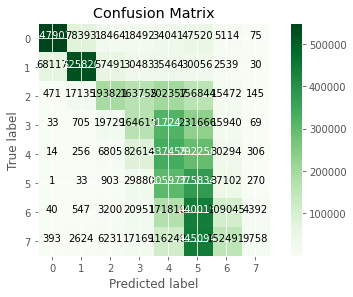

In [56]:
import itertools

print(classification_report(y_test, y_pred))

conf = get_confusion_matrix(y_test, y_pred)
conf

classes = [0, 1, 2, 3, 4, 5, 6, 7,]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[547901  78393  18464  18492  34041  47520   5114     75]
 [ 68117 525820  57491  30483  35464  30056   2539     30]
 [   471  17135 193821 163755 202357 156844  15472    145]
 [    33    705  19729 164615 317243 231666  15940     69]
 [    14    256   6805  82614 337455 292256  30294    306]
 [     1     33    903  29880 305977 375834  37102    270]
 [    40    547   3200  20951 171810 440015 109045   4392]
 [   393   2624   6231  17169 116240 445094 152491   9758]]
Normalized confusion matrix
[[7.31e-01 1.05e-01 2.46e-02 2.47e-02 4.54e-02 6.34e-02 6.82e-03 1.00e-04]
 [9.08e-02 7.01e-01 7.67e-02 4.06e-02 4.73e-02 4.01e-02 3.39e-03 4.00e-05]
 [6.28e-04 2.28e-02 2.58e-01 2.18e-01 2.70e-01 2.09e-01 2.06e-02 1.93e-04]
 [4.40e-05 9.40e-04 2.63e-02 2.19e-01 4.23e-01 3.09e-01 2.13e-02 9.20e-05]
 [1.87e-05 3.41e-04 9.07e-03 1.10e-01 4.50e-01 3.90e-01 4.04e-02 4.08e-04]
 [1.33e-06 4.40e-05 1.20e-03 3.98e-02 4.08e-01 5.01e-01 4.95e-02 3.60e-04]
 [5.33e-0

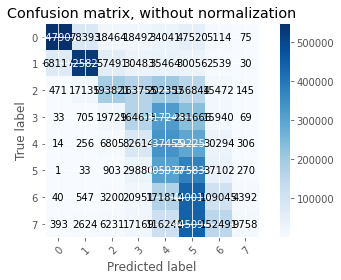

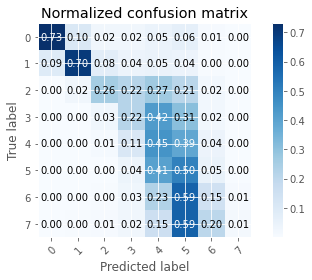

In [57]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = np.array([0, 1, 2, 3, 4, 5, 6, 7])

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()